# Mutation Frequency of Various Proteins in UCEC cohort

In [19]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import CPTAC.Endometrial as CPTAC

<b> Import Somatic Mutation Database </b>

In [22]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()

## Compare the number of PIK3CA mutations with number of wildtypes (no mutation)

      Patient_Id    Gene           Mutation        Location  \
160    C3L-00006  PIK3CA  Missense_Mutation         p.E545K   
1147   C3L-00032  PIK3CA  Missense_Mutation         p.E545K   
1426   C3L-00139  PIK3CA  Missense_Mutation         p.Q546P   
1574   C3L-00143  PIK3CA  Missense_Mutation         p.R115L   
2260   C3L-00156  PIK3CA  Missense_Mutation         p.L628R   
2261   C3L-00156  PIK3CA  Missense_Mutation        p.T1025A   
3417   C3L-00161  PIK3CA  Missense_Mutation          p.R38C   
3418   C3L-00161  PIK3CA  Missense_Mutation         p.V344M   
4648   C3L-00362  PIK3CA  Missense_Mutation        p.H1047R   
4756   C3L-00563  PIK3CA  Missense_Mutation         p.G118D   
4757   C3L-00563  PIK3CA  Missense_Mutation         p.E545V   
7216   C3L-00586  PIK3CA  Missense_Mutation          p.F83S   
7217   C3L-00586  PIK3CA  Missense_Mutation          p.R88Q   
7218   C3L-00586  PIK3CA  Missense_Mutation         p.K111N   
7219   C3L-00586  PIK3CA  Missense_Mutation        p.Y1

TypeError: unsupported operand type(s) for /: 'str' and 'int'

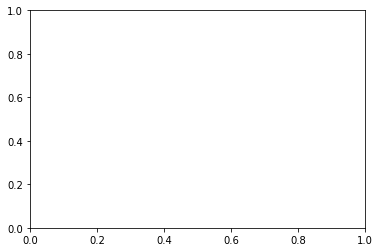

In [21]:
gene1 = 'PIK3CA'
gene2 = 'ARID1A'

#get the dataframe for PIK3CA and ARID1A mutations



pik3ca_mutations = somatic_mutations.loc[somatic_mutations['Gene'] == gene1]
arid_mutations = somatic_mutations.loc[somatic_mutations['Gene'] == gene2]

pik3ca_mutations = pik3ca_mutations[['Patient_Id', 'Gene']]


In [32]:
pik3 = CPTAC.compare_mutations(proteomics, gene1)
wt = pik3.loc[pik3['Mutation'] == 'Wildtype']
wt = wt.loc[wt['Patient_Type'] == 'Tumor']
print(len(wt))
print(wt)


arid = CPTAC.compare_mutations(proteomics, 'PTEN')
wt = arid.loc[arid['Mutation'] == 'Wildtype']
wt = wt.loc[wt['Patient_Type'] == 'Tumor']
print(len(wt))
print(wt)

52
        PIK3CA  Mutation Patient_Type
S002 -0.215000  Wildtype        Tumor
S004  0.470000  Wildtype        Tumor
S005 -0.392000  Wildtype        Tumor
S006  0.287000  Wildtype        Tumor
S007 -0.349000  Wildtype        Tumor
S008 -0.317000  Wildtype        Tumor
S011 -0.064000  Wildtype        Tumor
S013 -0.555000  Wildtype        Tumor
S015  0.203000  Wildtype        Tumor
S016  0.270000  Wildtype        Tumor
S017 -0.431000  Wildtype        Tumor
S019 -0.243000  Wildtype        Tumor
S020 -0.089000  Wildtype        Tumor
S025 -0.249000  Wildtype        Tumor
S029 -0.313000  Wildtype        Tumor
S034 -0.008430  Wildtype        Tumor
S035  0.851000  Wildtype        Tumor
S037  0.341000  Wildtype        Tumor
S039  0.023000  Wildtype        Tumor
S041  0.122000  Wildtype        Tumor
S042  0.575000  Wildtype        Tumor
S044  0.413000  Wildtype        Tumor
S045 -0.018500  Wildtype        Tumor
S046  0.018700  Wildtype        Tumor
S047  0.461000  Wildtype        Tumor
S048  0.1

In [35]:
mutations_first = somatic_mutations.loc[(somatic_mutations['Gene'] == gene1)]
#print(mutations_first[1:100])
#print(mutations_first['Clinical_Patient_Key'])

patients_first = mutations_first['Clinical_Patient_Key']
first_list = patients_first.tolist()
unique_1 = list()
for person in first_list:
    if person not in unique_1:
        unique_1.append(person)
return(unique_1)

44


In [43]:
def get_frequency(protein):
    mutations_first = somatic_mutations.loc[(somatic_mutations['Gene'] == gene1)]
    #print(mutations_first[1:100])
    #print(mutations_first['Clinical_Patient_Key'])

    patients_first = mutations_first['Clinical_Patient_Key']
    first_list = patients_first.tolist()
    unique_1 = list()
    for person in first_list:
        if person not in unique_1:
            unique_1.append(person)
    return(len(unique_1))

In [62]:
#print(somatic_mutations)

gene_frequencies = None


for protein in somatic_mutations.Gene:
    
    myfreq = get_frequency(protein)
    gene_df = {'Gene': [protein], 'Frequency': [myfreq]}
    #print(gene_freq)
    gene_df = pd.DataFrame(gene_df)
    
    if gene_frequencies is None:
        gene_frequencies = gene_df
    else:
        gene_frequencies = gene_frequencies.append(gene_df)


print(gene_frequencies)
#for gene in somatic_mutations.Gene:
    

         Gene  Frequency
0       MXRA8         49
0        GNB1         49
0       RPL22         49
0       CASZ1         49
0     PRAMEF9         49
0        SPEN         49
0        SPEN         49
0       NBPF1         49
0     ATP13A2         49
0       TMCO4         49
0       RPL11         49
0      PITHD1         49
0      ARID1A         49
0      ADGRB2         49
0        AGO1         49
0      INPP5B         49
0       MACF1         49
0       BMP8B         49
0       MAST2         49
0      ZFYVE9         49
0      CC2D1B         49
0      SLC1A7         49
0       PLPP3         49
0      CYP2J2         49
0     C1orf87         49
0     ANGPTL3         49
0       PDE4B         49
0      AKNAD1         49
0       AMPD2         49
0       HIPK1         49
..        ...        ...
0       NFASC         49
0        EPRS         49
0        STUM         49
0       SOX11         49
0      PLA2R1         49
0      PIK3CA         49
0       FRAS1         49
0       FBXW7         49
